In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("/home/deepak/Documents/ML-Intern/GOLD.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [3]:
X = ['Price','Open','High','Low']
y = 'Pred'
train = df[-np.isnan(df['Pred'])]
test = df[np.isnan(df['Pred'])]

In [35]:
model = LinearRegression().fit(train[X],train[y])
score = model.score(test[X],test[y])
coef = model.coef_
intercept = model.intercept_

1.0


In [6]:
test['Pred'] = model.predict(test[X])
test

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
411,"Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,852.0,195.423493
412,"Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,422.0,44.232664
413,"Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,530.0,127.646233
414,"Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,144.0,127.219539
415,"Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,415.0,372.603976
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,601.0,48.365693


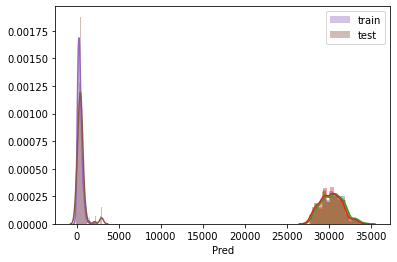

In [21]:
sns.distplot(df['Price'])
sns.distplot(df['Open'])
sns.distplot(df['High'])
sns.distplot(df['Low'])
sns.distplot(train['Pred'],label='train')
sns.distplot(test['Pred'], label='test')
plt.legend(loc = 'upper right')

In [37]:
# Linear Regression "New"
model_new = LinearRegression().fit(train[X],train[y])
score = model_new.score(test[X],test[y])
coef = model_new.coef_
intercept = model.intercept_

1.0


In [86]:
coef

array([ 2.,  3., -1., -4.])

In [34]:
poly = PolynomialFeatures(2)
model_poly = poly.fit_transform(train[X],test[X])
new_model_poly = LinearRegression().fit(train[X], train['new'])
new_model_poly.score(test[X],test['new'])

0.9999683016109174

In [41]:
test.loc['new_linear'] = model_new.predict( test[X])
test.loc['new_poly']   = new_model_poly.predict(test[X])

In [43]:
test.head()
# Hence 'Pred' was Linear and 'new' was Polynomial

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new,new_linear,new_poly
411,"Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,852.0,195.423493,852.0,195.871760
412,"Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,422.0,44.232664,422.0,43.810450
413,"Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,530.0,127.646233,530.0,127.645552
414,"Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,144.0,127.219539,144.0,126.848503
415,"Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,415.0,372.603976,415.0,373.255871


In [74]:
## 3.2
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split
nifty = pd.read_csv('/home/deepak/Documents/ML-Intern/Nifty50/Nifty50.csv', parse_dates=['Date'],index_col = 'Date')
adani = pd.read_csv('/home/deepak/Documents/ML-Intern/Mid_Cap/ADANIPOWER.csv', parse_dates=['Date'],index_col='Date')
adani.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,ADANIPOWER,EQ,30.25,30.40,30.50,30.10,30.35,30.25,30.28,2666848,8.074250e+07,4292,861729,32.31
2017-05-16,ADANIPOWER,EQ,30.25,30.35,33.65,30.35,32.80,32.85,32.59,39322702,1.281594e+09,57037,5217922,13.27
2017-05-17,ADANIPOWER,EQ,32.85,32.95,33.75,32.45,33.00,33.10,33.13,27368209,9.067376e+08,38034,3760475,13.74
2017-05-18,ADANIPOWER,EQ,33.10,32.80,32.85,31.70,31.90,31.90,32.37,9833756,3.182696e+08,15013,2046350,20.81
2017-05-19,ADANIPOWER,EQ,31.90,33.25,33.25,32.00,32.45,32.40,32.55,12551755,4.085741e+08,20421,2456282,19.57


In [52]:
nifty.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [ ]:
# This computes the linear regression correleation coefficent of the pct_change() between days.

# Beta is 1.3592 for ADANIPOWER vs NIFTY50

In [55]:
prices = pd.concat([ adani['Close Price'], nifty['Close']], axis=1)
prices.columns = ['ADANIPOWER', 'NIFTY50']
prices.head()

,ADANIPOWER,NIFTY50
Date,,
15-May-2017,30.25,9445.40
16-May-2017,32.85,9512.25
17-May-2017,33.10,9525.75
18-May-2017,31.90,9429.45
19-May-2017,32.40,9427.90


In [57]:
pct_changes = prices.pct_change().dropna(axis=0)
pct_changes.head()

,ADANIPOWER,NIFTY50
Date,,
16-May-2017,0.085950,0.007078
17-May-2017,0.007610,0.001419
18-May-2017,-0.036254,-0.010109
19-May-2017,0.015674,-0.000164
22-May-2017,-0.029321,0.001098


In [ ]:
#Beta can also be calculated using the linear regression covarience coefficent.

#Beta of ADANIPOWER vs NIFTY50 is 1.3592

In [71]:
Px  = pct_changes['NIFTY50']
Py = pct_changes['ADANIPOWER']
Px1 = sm.add_constant(Px)
model = OLS( Py, Px1 )
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ADANIPOWER   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     138.4
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           2.58e-28
Time:                        00:40:21   Log-Likelihood:                 968.43
No. Observations:                 493   AIC:                            -1933.
Df Residuals:                     491   BIC:                            -1924.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.002      0.199      0.842      -0.003       0.003
NIFTY50        2.5025      0.213     11.763      0.000       2.084       2.920
==============================================================================
Omnibus:                      136.836   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1006.537
Skew:                           0.994   Prob(JB):                    2.71e-219
Kurtosis:                       9.712   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
## Monthly
nifty['month'] = nifty.index.map(lambda date: f"{date.year}-{date.month}")
adani['month'] = adani.index.map(lambda date: f"{date.year}-{date.month}")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2017-05-15 to 2019-05-13
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               494 non-null    float64
 1   High               494 non-null    float64
 2   Low                494 non-null    float64
 3   Close              494 non-null    float64
 4   Shares Traded      494 non-null    int64  
 5   Turnover (Rs. Cr)  494 non-null    float64
 6   month              494 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 30.9+ KB


In [ ]:
# Here we groupby year+month, taking the last price of each month rather than each day. Then recompute the linear regression correleation coefficient of the pct_change() between the index and the stock.

# Monthly Beta is 1.7670

In [77]:
nifty_monthly = nifty.groupby('month').last()
adani_monthly = adani.groupby('month').last()
adani_monthly.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
month,,,,,,,,,,,,,,
2017-10,ADANIPOWER,EQ,33.45,33.60,33.60,31.95,32.85,32.75,32.68,12858464,4.201582e+08,16309,4094794,31.85
2017-11,ADANIPOWER,EQ,36.00,35.85,36.05,35.20,35.50,35.50,35.57,6720465,2.390793e+08,11767,1897902,28.24
2017-12,ADANIPOWER,EQ,40.70,40.80,42.10,40.60,41.60,41.70,41.34,13477195,5.572042e+08,19564,3179942,23.59
2017-5,ADANIPOWER,EQ,27.35,27.60,28.15,27.15,27.90,27.70,27.57,12954263,3.571181e+08,15130,3140616,24.24
2017-6,ADANIPOWER,EQ,29.10,29.20,30.10,28.70,29.70,29.80,29.54,11179263,3.301910e+08,14577,3265596,29.21


In [79]:
price_monthly = pd.concat([ adani_monthly['Close Price'], nifty_monthly['Close']], axis=1)
price_monthly.columns = ['ADANIPOWER_M', 'NIFTY50_M']
monthly_pct = price_monthly.pct_change().dropna(axis=0)
monthly_pct.head()

,ADANIPOWER_M,NIFTY50_M
month,,
2017-11,0.083969,-0.010522
2017-12,0.174648,0.029741
2017-5,-0.335731,-0.086362
2017-6,0.075812,-0.010430
2017-7,0.124161,0.058419


In [83]:
MPx  = monthly_pct['NIFTY50_M']
MPy = monthly_pct['ADANIPOWER_M']
MPx1 = sm.add_constant(MPx)
model_M = OLS( MPy, MPx1 )
model_M.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ADANIPOWER_M   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     5.531
Date:                Fri, 17 Jul 2020   Prob (F-statistic):             0.0281
Time:                        00:51:15   Log-Likelihood:                -4.0772
No. Observations:                  24   AIC:                             12.15
Df Residuals:                      22   BIC:                             14.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0358      0.061      0.584      0.565      -0.091       0.163
NIFTY50_M      2.9465      1.253      2.352      0.028       0.348       5.545
==============================================================================
Omnibus:                       20.195   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.428
Skew:                           1.912   Prob(JB):                     4.96e-06
Kurtosis:                       6.132   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""